# Project 4 : Ensembled Technique By Bappa Bhalsing

In [1]:
# Import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
# To remove warnings from result
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


In [2]:
# Loading data
bankdf=pd.read_csv('bank-full.csv')
bankdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bankdf.shape

(45211, 17)

##### Data frame has 45211 rows and 17 Colunms.

In [4]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bankdf.isnull().sum().sum()

0

##### No Missing value present data Frame

### 5 Point summary for all Numerical Attribute

In [6]:
bankdf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


##### Age: Range of age attribute is 18 to 95 and mean & 50 % value almost equal indocate no outlier in this attribute.
##### Balance: Minimum Balance value in negative and 50 % & mean is less than standard deviation leads further data correction.
##### Pdays: This colunms need to rectify as values in negative.

In [7]:
# Checking negative values in balance attributes
bankdf[bankdf['balance']<0].shape


(3766, 17)

##### 3766 entries are having negative values for balance attributes this is error in data, need to clear.

### Data correction

In [8]:
# using absolute function, the negative values converted ino absolute number.
bankdf['balance']=abs(bankdf['balance'])

In [9]:
bankdf[bankdf['pdays']<0].shape

(36954, 17)

In [10]:
bankdf['pdays']=abs(bankdf['pdays'])
bankdf[bankdf['pdays']<0].shape

(0, 17)

##### Balance columns should expected outliers as mean and 50 % value have significant difference.
##### Overall data dotribution asymetric and non normal

### Checking Outliers in all Numerical Attribute

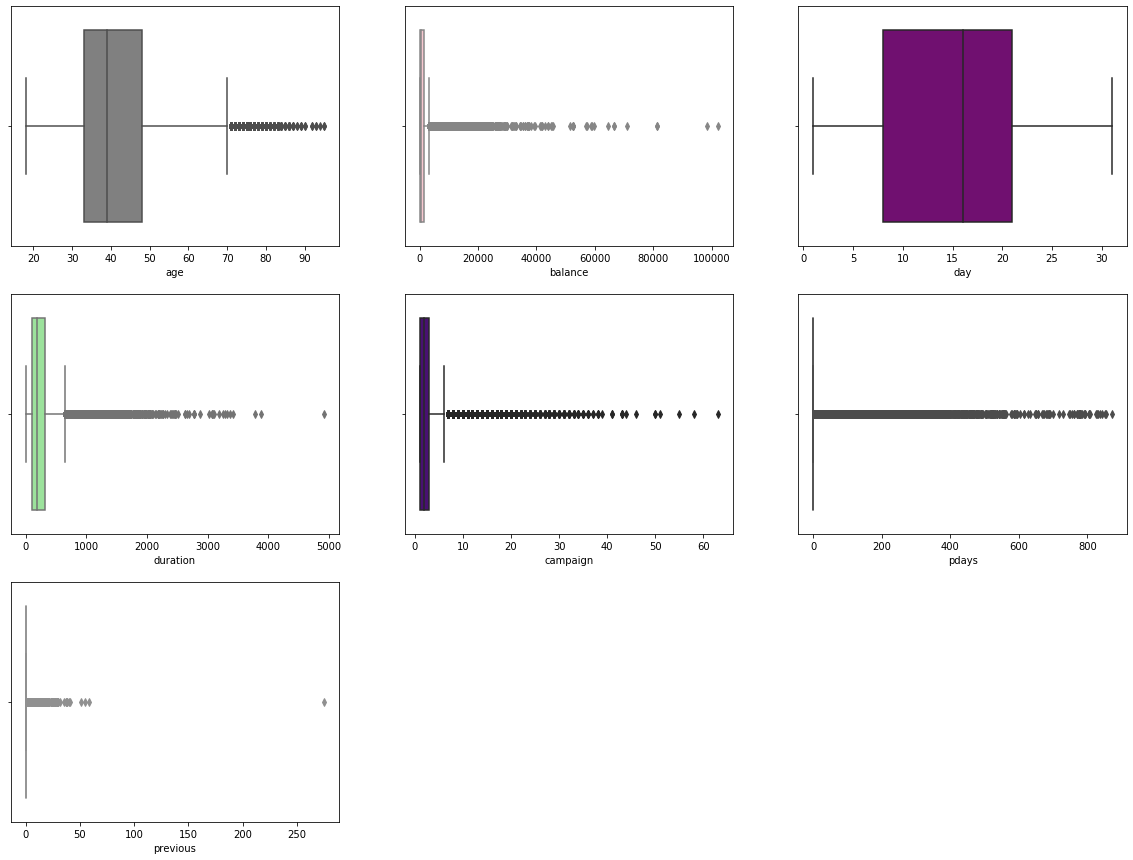

In [11]:
# Use Boxtplot to check outliers.
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= bankdf.age, color='grey')

plt.subplot(3,3,2)
sns.boxplot(x= bankdf.balance, color='pink')

plt.subplot(3,3,3)
sns.boxplot(x=bankdf.day, color='purple')
plt.subplot(3,3,4)
sns.boxplot(x=bankdf.duration, color='lightgreen')
plt.subplot(3,3,5)
sns.boxplot(x=bankdf.campaign, color='indigo')
plt.subplot(3,3,6)
sns.boxplot(x=bankdf.pdays, color='blue')
plt.subplot(3,3,7)
sns.boxplot(x=bankdf.previous, color='lightyellow')
plt.show()

##### Outliers present in each feature of data frame except Day( this is date column)

### Visualising Numerical Features of data( Only selected features)

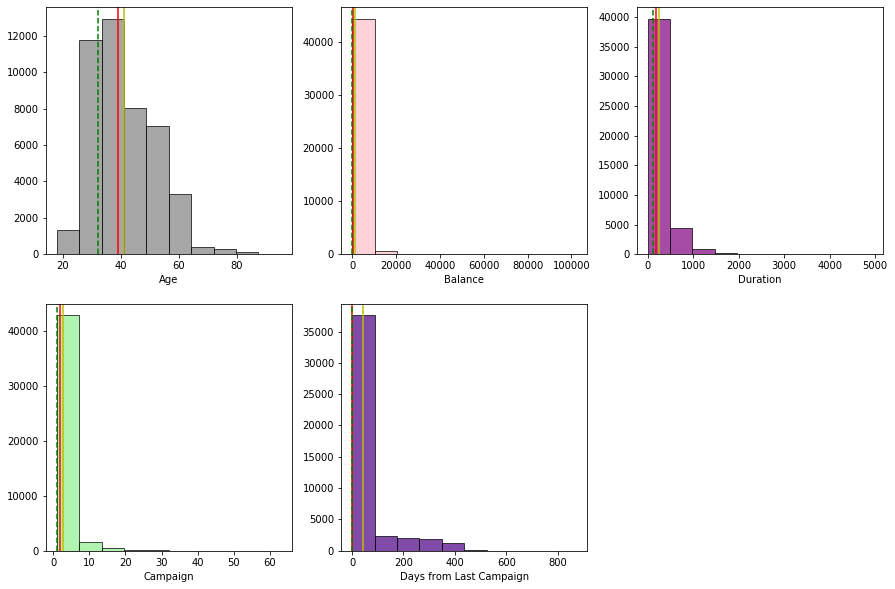

In [12]:
plt.figure(figsize= (15,10))
plt.subplot(2,3,1)
plt.hist(bankdf.age, color='grey', edgecolor = 'black', alpha = 0.7)
plt.axvline(bankdf['age'].mean(), color='y')
plt.axvline(bankdf['age'].median(), color='r')
plt.axvline(bankdf['age'].mode()[0], color='g', linestyle='--')
plt.xlabel('Age')

plt.subplot(2,3,2)
plt.hist(bankdf.balance, color='pink', edgecolor = 'black', alpha = 0.7)
plt.axvline(bankdf['balance'].mean(), color='y')
plt.axvline(bankdf['balance'].median(), color='r')
plt.axvline(bankdf['balance'].mode()[0], color='g', linestyle='--')
plt.xlabel('Balance')

plt.subplot(2,3,3)
plt.hist(bankdf.duration, color='purple', edgecolor = 'black', alpha = 0.7)
plt.axvline(bankdf['duration'].mean(), color='y')
plt.axvline(bankdf['duration'].median(), color='r')
plt.axvline(bankdf['duration'].mode()[0], color='g', linestyle='--')
plt.xlabel('Duration')

plt.subplot(2,3,4)
plt.hist(bankdf.campaign, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.axvline(bankdf['campaign'].mean(), color='y')
plt.axvline(bankdf['campaign'].median(), color='r')
plt.axvline(bankdf['campaign'].mode()[0], color='g', linestyle='--')
plt.xlabel('Campaign')

plt.subplot(2,3,5)
plt.hist(bankdf.pdays, color='indigo', edgecolor = 'black', alpha = 0.7)
plt.axvline(bankdf['pdays'].mean(), color='y')
plt.axvline(bankdf['pdays'].median(), color='r')
plt.axvline(bankdf['pdays'].mode()[0], color='g', linestyle='--',)
plt.xlabel('Days from Last Campaign')


plt.show()

##### Distribution of Age is symetric.
##### Remaining numeric colunms distribution is right tailed 

### Pairplot

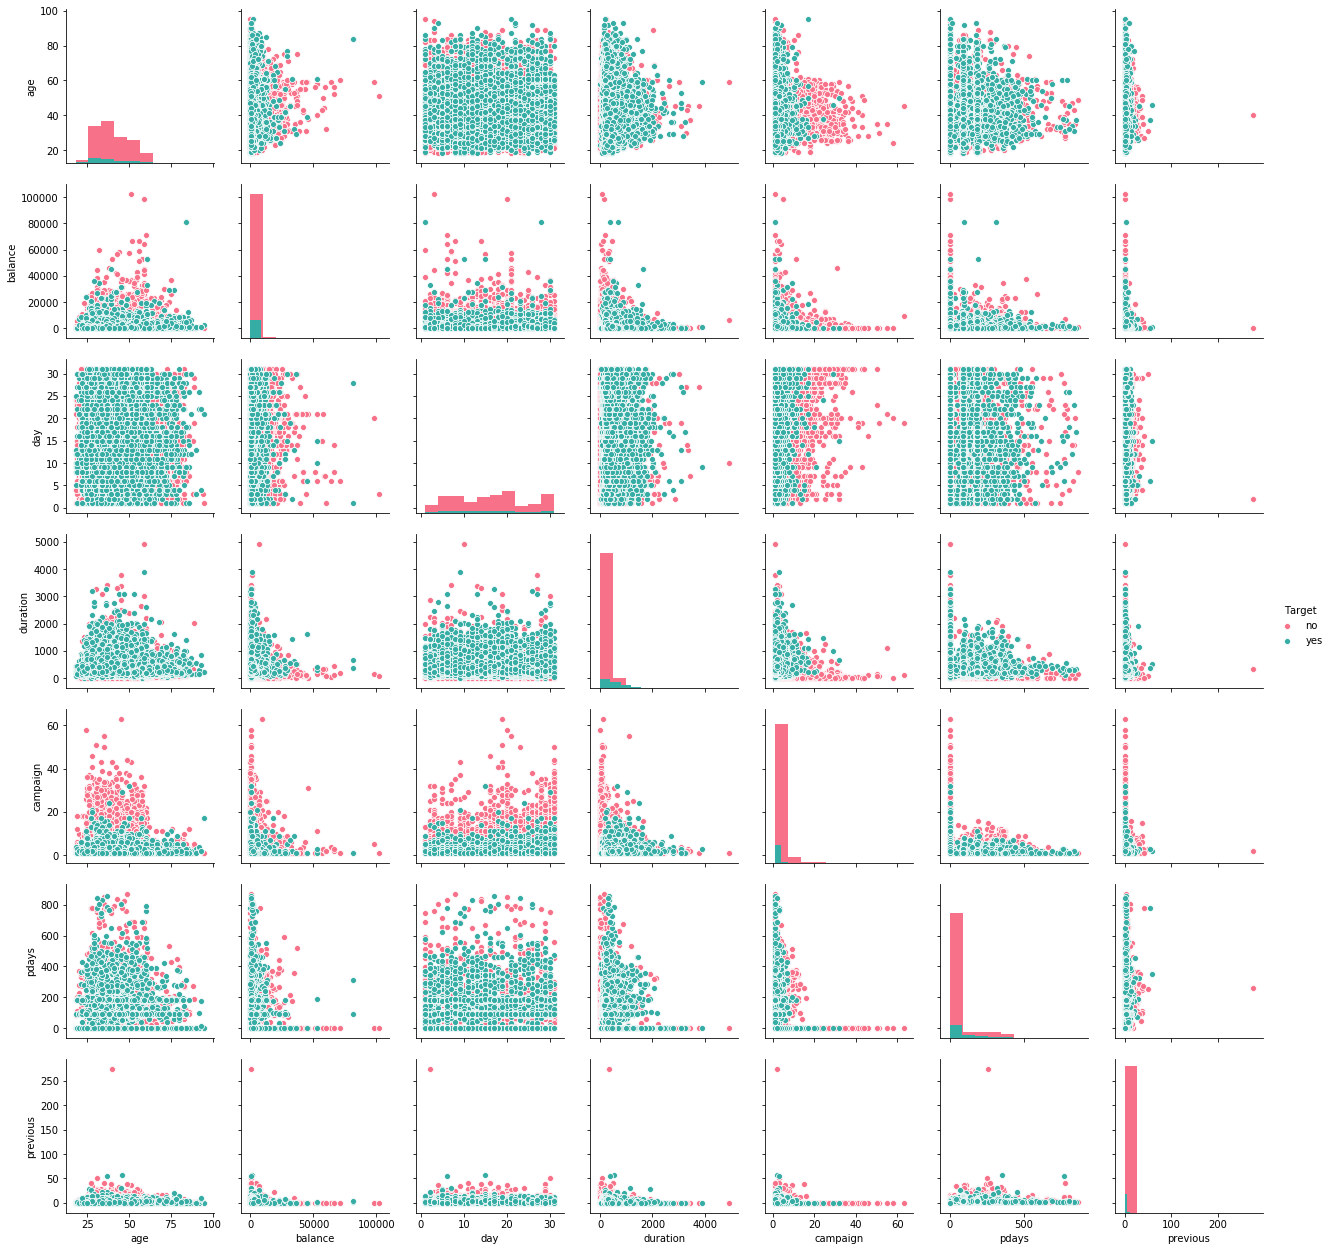

In [13]:
sns.pairplot(data=bankdf, hue='Target' ,diag_kind='hist', palette='husl')

##### Pairplot  has limitation in this case to show correlation with each other

##### Pairplot have limitation to indicate right correction of data.

###  Checking Data Correlation

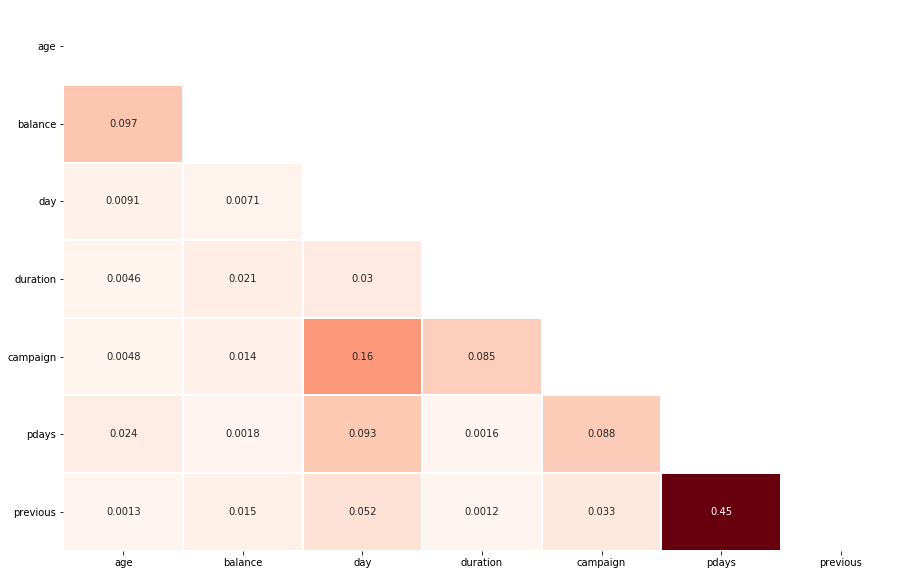

In [14]:
# 
corr=abs(bankdf.corr())
lower_triangle = np.tril(corr, k = -1)
mask=lower_triangle==0
plt.figure(figsize=(15,10))
sns.heatmap(lower_triangle,cmap= 'Reds', annot=True,xticklabels = corr.index, yticklabels = corr.columns,cbar= False, linewidths= 1, mask=mask);
plt.yticks(rotation = 0)
plt.show()

##### Significant correlation not observed among all features
##### Only pdays(number of days that passed by after the client was last contacted from a previous campaign) has hoghest correlation with Previous(number of contacts performed before this campaign) - This is significant input for further analysis.

### Checking Distribution of Target Colunm

no     39922
yes     5289
Name: Target, dtype: int64


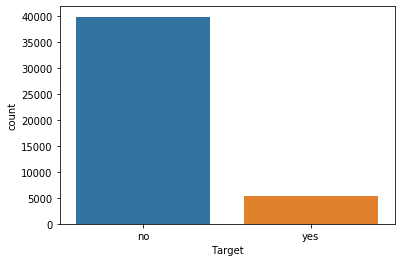

In [15]:
sns.countplot(x=bankdf['Target']);
print(bankdf['Target'].value_counts());

##### Nearly 11 % customer subcribed to Term Deposite

job     admin.  blue-collar  entrepreneur  housemaid  management  retired  \
Target                                                                      
no        4540         9024          1364       1131        8157     1748   
yes        631          708           123        109        1301      516   

job     self-employed  services  student  technician  unemployed  unknown  
Target                                                                     
no               1392      3785      669        6757        1101      254  
yes               187       369      269         840         202       34  


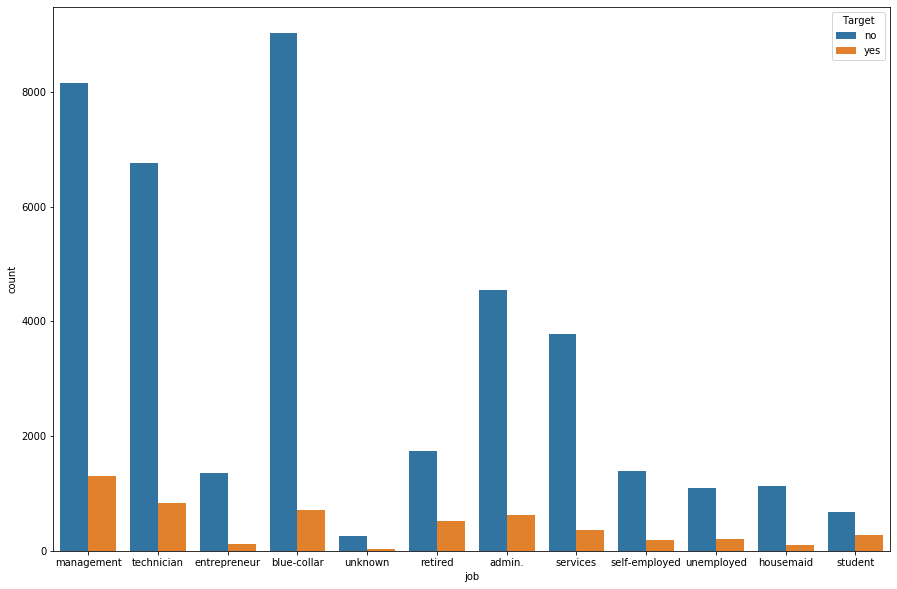

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x=bankdf['job'], hue=bankdf['Target']);
print(pd.pivot_table(data=bankdf,index='Target',columns='job',aggfunc='size'))

##### Managemet & Technician are highest among all professional

marital  divorced  married  single
Target                            
no           4585    24459   10878
yes           622     2755    1912


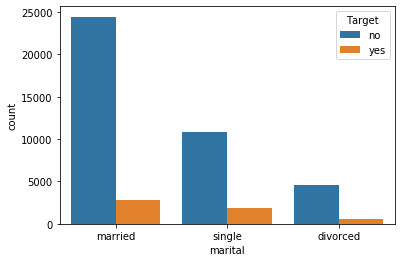

In [17]:
sns.countplot(x=bankdf['marital'], hue=bankdf['Target']);
print(pd.pivot_table(data=bankdf,index='Target',columns='marital',aggfunc='size'))

##### Married customer are higest among Marital class for Term Deposite

education  primary  secondary  tertiary  unknown
Target                                          
no            6260      20752     11305     1605
yes            591       2450      1996      252


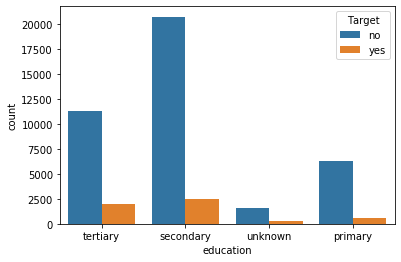

In [18]:
sns.countplot(x=bankdf['education'], hue=bankdf['Target']);
print(pd.pivot_table(data=bankdf,index='Target',columns='education',aggfunc='size'))

##### Customer having Seconndary level education are highest term deposite subcriber among this class.

default     no  yes
Target             
no       39159  763
yes       5237   52


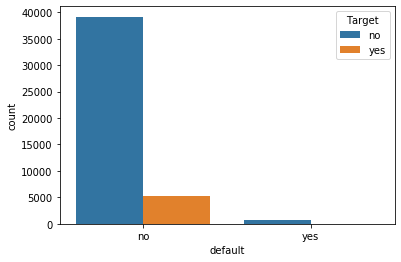

In [19]:
sns.countplot(x=bankdf['default'], hue=bankdf['Target']);
print(pd.pivot_table(data=bankdf,index='Target',columns='default',aggfunc='size'))

##### Non defaulter customer are inclined to Term Deposite subcription

housing     no    yes
Target               
no       16727  23195
yes       3354   1935


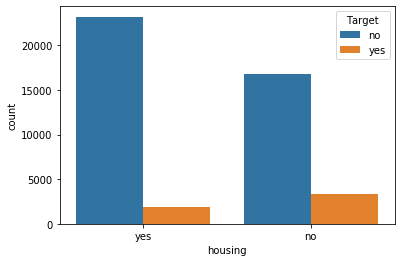

In [20]:
sns.countplot(x=bankdf['housing'], hue=bankdf['Target']);
print(pd.pivot_table(data=bankdf,index='Target',columns='housing',aggfunc='size'))

##### Non Housing Loan customer also inlined to take term deposite subcription

loan       no   yes
Target             
no      33162  6760
yes      4805   484


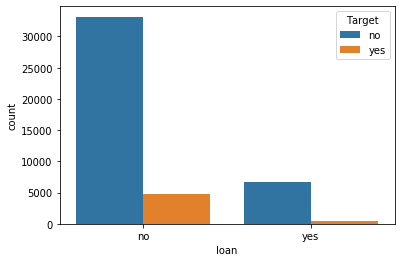

In [21]:
sns.countplot(x=bankdf['loan'], hue=bankdf['Target']);
print(pd.pivot_table(data=bankdf,index='Target',columns='loan',aggfunc='size'))

##### Customer who doesn't Personal Loan are higher in taking Term Deposite Subscription.

contact  cellular  telephone  unknown
Target                               
no          24916       2516    12490
yes          4369        390      530


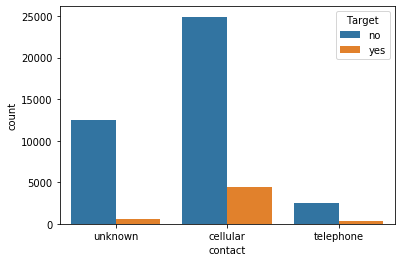

In [22]:
sns.countplot(x=bankdf['contact'], hue=bankdf['Target']);
print(pd.pivot_table(data=bankdf,index='Target',columns='contact',aggfunc='size'))

##### Customer have cellular method of contact are significant customer to accept term deposite offer

month    apr   aug  dec   feb   jan   jul   jun  mar    may   nov  oct  sep
Target                                                                     
no      2355  5559  114  2208  1261  6268  4795  229  12841  3567  415  310
yes      577   688  100   441   142   627   546  248    925   403  323  269


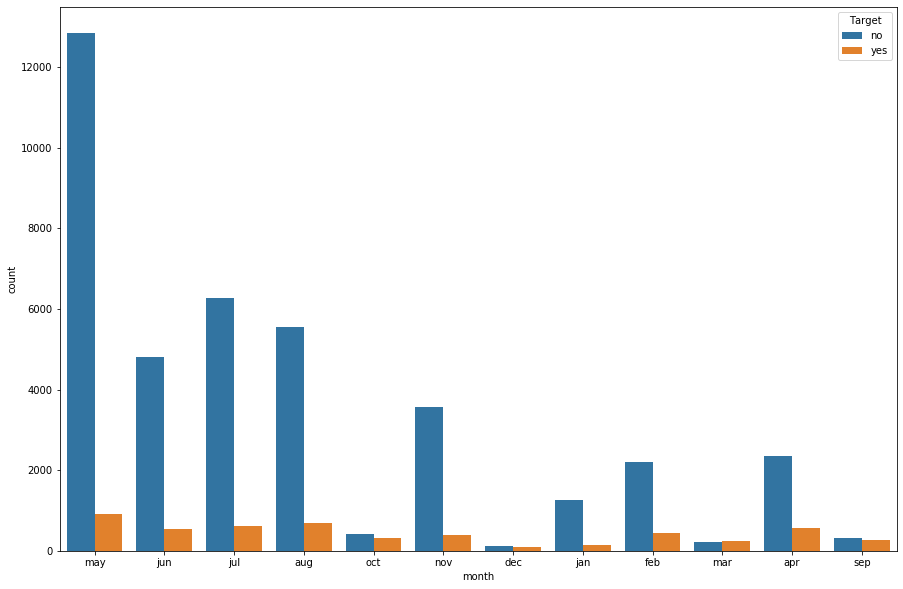

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(x=bankdf['month'], hue=bankdf['Target']);
print(pd.pivot_table(data=bankdf,index='Target',columns='month',aggfunc='size'))

### Data Preparation 

#### Creating Dummy variable for categorical data

In [24]:
# Target colunm values require to change
bankdf['Target']=bankdf['Target'].replace(to_replace=['yes','no'], value=[1, 0])

In [25]:
bankdf1 = pd.get_dummies(bankdf, columns= ['job','marital','education','default','housing','loan','contact','poutcome']) 

In [26]:
bankdf2=bankdf1.drop(['day','month'],1)

In [27]:
bankdf2.shape

(45211, 39)

### Split Data in Train & Test( 70:30)

In [28]:
# Importing all necessary library
from sklearn.model_selection import train_test_split
X = bankdf2.drop('Target', axis=1)
y = bankdf2[['Target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


In [29]:
print(X_test.shape)
X_train.shape

(13564, 38)


(31647, 38)

##### Data Preprocessing

In [30]:
X_test.head()

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
14789,45,0,154,2,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
8968,41,5,178,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
34685,40,906,67,4,1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
2369,25,768,203,1,1,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
36561,37,0,631,1,344,1,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  

scaler.fit(X_train.iloc[:,1:7])

X_train_scaled = scaler.transform(X_train.iloc[:,1:7])
X_test_scaled = scaler.transform(X_test.iloc[:,1:7])


X_train.iloc[:,1:7] = X_train_scaled 
X_test.iloc[:,1:7] = X_test_scaled

C:\Users\bappa.bhalsing\AppData\Local\conda\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Building Base Models
#### Iteration 1

In [32]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    from sklearn import metrics
    
    model.fit(X_train, y_train)   # fir the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set


    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # compute the confusion matrix from the predictions and actuals

    recall = round(tp/(tp+fn), 3)   
    precision = round(tp/(tp+fp), 3)  
    specificity =round(tn/(tn+fp),3) 
    f1_score =  round(2*precision*recall/(precision + recall), 3)
    MisclasRate=round((fp+fn)/(tp+tn+fp+fn),3)
    
    return score, recall, precision, specificity, f1_score, MisclasRate  # return all the metrics

In [33]:
lo = LogisticRegression(solver = 'liblinear')  # 
lo_accuracy, lo_recall, lo_precision, lo_specificity, lo_f1_score, lo_MisclasRate = fit_n_print(lo, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score, knn_MisclasRate = fit_n_print(knn, X_train, X_test, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score, nb_MisclasRate = fit_n_print(nb, X_train, X_test, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score, svm_MisclasRate = fit_n_print(svm, X_train, X_test, y_train, y_test )

In [34]:
Base_Model_Result = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                          'Accuracy': [ lo_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                          'Recall' : [lo_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lo_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lo_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lo_f1_score, knn_f1_score, nb_f1_score, svm_f1_score],
                       'Misclassification Rate': [lo_MisclasRate, knn_MisclasRate, nb_MisclasRate, svm_MisclasRate]})


### Ensemble Models
##### Iteration 1

In [35]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)  # 
dTree_accuracy, dTree_recall, dTree_precision, dTree_specificity, dTree_f1_score, dTree_MisclasRate = fit_n_print(dTree, X_train, X_test, y_train, y_test)

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR_accuracy,dTreeR_recall, dTreeR_precision, dTreeR_specificity, dTreeR_f1_score, dTreeR_MisclasRate = fit_n_print(dTreeR, X_train, X_test, y_train, y_test )



bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl_accuracy, bgcl_recall, bgcl_precision, bgcl_specificity, bgcl_f1_score, bgcl_MisclasRate = fit_n_print(bgcl, X_train, X_test, y_train, y_test )


abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl_accuracy, abcl_recall, abcl_precision, abcl_specificity, abcl_f1_score, abcl_MisclasRate = fit_n_print(abcl, X_train, X_test, y_train, y_test )


rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl_accuracy, rfcl_recall, rfcl_precision, rfcl_specificity, rfcl_f1_score, rfcl_MisclasRate = fit_n_print(rfcl, X_train, X_test, y_train, y_test )

gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl_accuracy, gbcl_recall, gbcl_precision, gbcl_specificity, gbcl_f1_score, gbcl_MisclasRate = fit_n_print(gbcl, X_train, X_test, y_train, y_test )


In [37]:
Ensembled_Tech_Result = pd.DataFrame({'Model' : ['Decision Tree', 'Decision Tree-Reduced', "Bagging", 'Adaboosting', 'Random Forest', 'Gradient Boosting'],
                          'Accuracy': [ dTree_accuracy ,  dTreeR_accuracy ,  bgcl_accuracy ,  abcl_accuracy, rfcl_accuracy,gbcl_accuracy ],
                          'Recall' : [dTree_recall ,  dTreeR_recall ,  bgcl_recall ,  abcl_recall, rfcl_recall,gbcl_recall],
                          'Precision': [dTree_precision ,  dTreeR_precision ,  bgcl_precision ,  abcl_precision, rfcl_precision,gbcl_precision ],
                          'Specificity': [dTree_specificity ,  dTreeR_specificity ,  bgcl_specificity ,  abcl_specificity, rfcl_specificity,gbcl_specificity ],
                          'F1 Score' : [dTree_f1_score, dTreeR_f1_score, bgcl_f1_score, abcl_f1_score, rfcl_f1_score,gbcl_f1_score ],
                       'Misclassification Rate': [dTree_MisclasRate, dTreeR_MisclasRate, bgcl_MisclasRate, abcl_MisclasRate,rfcl_MisclasRate,gbcl_MisclasRate]})


### Visualizing the Decision Tree

In [38]:
train_char_label = ['No', 'Yes']
Bank_Tree_File = open('bank_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Bank_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Bank_Tree_File.close()

#####  My does machine does not have GraphViz installed.
##### Checking all graph on http://webgraphviz.com/

##### Bank Tree is having high dept

In [39]:
train_char_label = ['No', 'Yes']
Bank_Tree_FileR = open('bank_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Bank_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Bank_Tree_FileR.close()

### Result of Variaous Models

### Comparison with Base Models

In [40]:
Final_conclusion1 =pd.concat([Base_Model_Result,Ensembled_Tech_Result], join='inner');

In [41]:
Final_conclusion1

,Model,Accuracy,Recall,Precision,Specificity,F1 Score,Misclassification Rate
0,Logistic Regression,0.898,0.315,0.626,0.975,0.419,0.102
1,KNN,0.890,0.324,0.547,0.965,0.407,0.110
2,Naive Bayes',0.806,0.550,0.312,0.840,0.398,0.194
3,SVM,0.894,0.212,0.627,0.983,0.317,0.106
0,Decision Tree,0.864,0.425,0.416,0.921,0.420,0.136
1,Decision Tree-Reduced,0.899,0.296,0.640,0.978,0.405,0.101
2,Bagging,0.896,0.385,0.578,0.963,0.462,0.104
3,Adaboosting,0.895,0.359,0.577,0.965,0.443,0.105
4,Random Forest,0.898,0.381,0.595,0.966,0.465,0.102
5,Gradient Boosting,0.903,0.372,0.640,0.972,0.471,0.097


##### In Base model Logistic Regression accuracy and Random Forest Accuracy is equal and same.
##### Gradient Boosting accuracy highest among all Models i.e 90.3%
##### Overall Ensembled Techniques' model accuracy is better compare to base model.


#### Iteration 2
#### Dropping 'age' columns

In [42]:
X_train2 = X_train.drop(columns = 'age')
X_test2 = X_test.drop(columns = 'age')

In [43]:
# Base Model
lo = LogisticRegression(solver = 'liblinear')  # 
lo_accuracy, lo_recall, lo_precision, lo_specificity, lo_f1_score, lo_MisclasRate = fit_n_print(lo, X_train2, X_test2, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score, knn_MisclasRate = fit_n_print(knn, X_train2, X_test2, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score, nb_MisclasRate = fit_n_print(nb, X_train2, X_test2, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score, svm_MisclasRate = fit_n_print(svm, X_train2, X_test2, y_train, y_test )
# Ensembled Model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)  # 
dTree_accuracy, dTree_recall, dTree_precision, dTree_specificity, dTree_f1_score, dTree_MisclasRate = fit_n_print(dTree, X_train2, X_test2, y_train, y_test)

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR_accuracy,dTreeR_recall, dTreeR_precision, dTreeR_specificity, dTreeR_f1_score, dTreeR_MisclasRate = fit_n_print(dTreeR, X_train2, X_test2, y_train, y_test )



bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl_accuracy, bgcl_recall, bgcl_precision, bgcl_specificity, bgcl_f1_score, bgcl_MisclasRate = fit_n_print(bgcl, X_train2, X_test2, y_train, y_test )


abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl_accuracy, abcl_recall, abcl_precision, abcl_specificity, abcl_f1_score, abcl_MisclasRate = fit_n_print(abcl, X_train2, X_test2, y_train, y_test )


rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl_accuracy, rfcl_recall, rfcl_precision, rfcl_specificity, rfcl_f1_score, rfcl_MisclasRate = fit_n_print(rfcl, X_train2, X_test2, y_train, y_test )

gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl_accuracy, gbcl_recall, gbcl_precision, gbcl_specificity, gbcl_f1_score, gbcl_MisclasRate = fit_n_print(gbcl, X_train2, X_test2, y_train, y_test )


In [44]:
Result2 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM','Decision Tree', 'Decision Tree-Reduced', "Bagging", 'Adaboosting', 'Random Forest','Gradient Boosting' ],
                          'Accuracy': [ lo_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ,dTree_accuracy ,  dTreeR_accuracy ,  bgcl_accuracy ,  abcl_accuracy, rfcl_accuracy, gbcl_accuracy],
                          'Recall' : [lo_recall ,  knn_recall ,  nb_recall ,  svm_recall ,dTree_recall ,  dTreeR_recall ,  bgcl_recall ,  abcl_recall, rfcl_recall, gbcl_recall],
                          'Precision': [lo_precision ,  knn_precision ,  nb_precision ,  svm_precision,dTree_precision ,  dTreeR_precision ,  bgcl_precision ,  abcl_precision, rfcl_precision, gbcl_precision  ],
                          'Specificity': [lo_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity,dTree_specificity ,  dTreeR_specificity ,  bgcl_specificity ,  abcl_specificity, rfcl_specificity, gbcl_specificity ],
                          'F1 Score' : [lo_f1_score, knn_f1_score, nb_f1_score, svm_f1_score,dTree_f1_score, dTreeR_f1_score, bgcl_f1_score, abcl_f1_score, rfcl_f1_score, gbcl_f1_score],
                       'Misclassification Rate': [lo_MisclasRate, knn_MisclasRate, nb_MisclasRate, svm_MisclasRate,dTree_MisclasRate, dTreeR_MisclasRate, bgcl_MisclasRate, abcl_MisclasRate,rfcl_MisclasRate, gbcl_MisclasRate]})
Result2

,Model,Accuracy,Recall,Precision,Specificity,F1 Score,Misclassification Rate
0,Logistic Regression,0.898,0.314,0.625,0.975,0.418,0.102
1,KNN,0.889,0.350,0.535,0.960,0.423,0.111
2,Naive Bayes',0.803,0.548,0.307,0.837,0.394,0.197
3,SVM,0.894,0.208,0.633,0.984,0.313,0.106
4,Decision Tree,0.860,0.434,0.405,0.916,0.419,0.140
5,Decision Tree-Reduced,0.899,0.296,0.640,0.978,0.405,0.101
6,Bagging,0.893,0.374,0.559,0.961,0.448,0.107
7,Adaboosting,0.895,0.368,0.575,0.964,0.449,0.105
8,Random Forest,0.896,0.381,0.581,0.964,0.460,0.104
9,Gradient Boosting,0.901,0.360,0.633,0.972,0.459,0.099


##### There is no Singnificant change is all Model in this iteration

#### Iteration 3

In [45]:
X_train3 = X_train2.drop(columns = 'campaign')
X_test3 = X_test2.drop(columns = 'campaign')

In [46]:
# Base Model
lo = LogisticRegression(solver = 'liblinear')  # 
lo_accuracy, lo_recall, lo_precision, lo_specificity, lo_f1_score, lo_MisclasRate = fit_n_print(lo, X_train3, X_test3, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score, knn_MisclasRate = fit_n_print(knn, X_train3, X_test3, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score, nb_MisclasRate = fit_n_print(nb, X_train3, X_test3, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score, svm_MisclasRate = fit_n_print(svm, X_train3, X_test3, y_train, y_test )
# Ensembled Model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)  # 
dTree_accuracy, dTree_recall, dTree_precision, dTree_specificity, dTree_f1_score, dTree_MisclasRate = fit_n_print(dTree, X_train3, X_test3, y_train, y_test)

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR_accuracy,dTreeR_recall, dTreeR_precision, dTreeR_specificity, dTreeR_f1_score, dTreeR_MisclasRate = fit_n_print(dTreeR, X_train3, X_test3, y_train, y_test )



bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl_accuracy, bgcl_recall, bgcl_precision, bgcl_specificity, bgcl_f1_score, bgcl_MisclasRate = fit_n_print(bgcl, X_train3, X_test3, y_train, y_test )


abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl_accuracy, abcl_recall, abcl_precision, abcl_specificity, abcl_f1_score, abcl_MisclasRate = fit_n_print(abcl, X_train3, X_test3, y_train, y_test )


rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl_accuracy, rfcl_recall, rfcl_precision, rfcl_specificity, rfcl_f1_score, rfcl_MisclasRate = fit_n_print(rfcl, X_train3, X_test3, y_train, y_test )

gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl_accuracy, gbcl_recall, gbcl_precision, gbcl_specificity, gbcl_f1_score, gbcl_MisclasRate = fit_n_print(gbcl, X_train3, X_test3, y_train, y_test )


In [47]:
Result3 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM','Decision Tree', 'Decision Tree-Reduced', "Bagging", 'Adaboosting', 'Random Forest','Gradient Boosting' ],
                          'Accuracy': [ lo_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ,dTree_accuracy ,  dTreeR_accuracy ,  bgcl_accuracy ,  abcl_accuracy, rfcl_accuracy, gbcl_accuracy],
                          'Recall' : [lo_recall ,  knn_recall ,  nb_recall ,  svm_recall ,dTree_recall ,  dTreeR_recall ,  bgcl_recall ,  abcl_recall, rfcl_recall, gbcl_recall],
                          'Precision': [lo_precision ,  knn_precision ,  nb_precision ,  svm_precision,dTree_precision ,  dTreeR_precision ,  bgcl_precision ,  abcl_precision, rfcl_precision, gbcl_precision  ],
                          'Specificity': [lo_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity,dTree_specificity ,  dTreeR_specificity ,  bgcl_specificity ,  abcl_specificity, rfcl_specificity, gbcl_specificity ],
                          'F1 Score' : [lo_f1_score, knn_f1_score, nb_f1_score, svm_f1_score,dTree_f1_score, dTreeR_f1_score, bgcl_f1_score, abcl_f1_score, rfcl_f1_score, gbcl_f1_score],
                       'Misclassification Rate': [lo_MisclasRate, knn_MisclasRate, nb_MisclasRate, svm_MisclasRate,dTree_MisclasRate, dTreeR_MisclasRate, bgcl_MisclasRate, abcl_MisclasRate,rfcl_MisclasRate, gbcl_MisclasRate]})
Result3

,Model,Accuracy,Recall,Precision,Specificity,F1 Score,Misclassification Rate
0,Logistic Regression,0.898,0.314,0.618,0.974,0.416,0.102
1,KNN,0.891,0.357,0.547,0.961,0.432,0.109
2,Naive Bayes',0.808,0.535,0.311,0.844,0.393,0.192
3,SVM,0.894,0.206,0.632,0.984,0.311,0.106
4,Decision Tree,0.856,0.412,0.387,0.914,0.399,0.144
5,Decision Tree-Reduced,0.899,0.296,0.640,0.978,0.405,0.101
6,Bagging,0.893,0.379,0.558,0.960,0.451,0.107
7,Adaboosting,0.893,0.400,0.555,0.958,0.465,0.107
8,Random Forest,0.894,0.367,0.572,0.964,0.447,0.106
9,Gradient Boosting,0.901,0.355,0.637,0.973,0.456,0.099


#### Minor Changes observed in Precision of all Models in this iteration

#### Iterartion 4

In [48]:
X_train4 = X_train3.drop(columns = 'pdays')
X_test4 = X_test3.drop(columns = 'pdays')

In [49]:
# Base Model
lo = LogisticRegression(solver = 'liblinear')  # 
lo_accuracy, lo_recall, lo_precision, lo_specificity, lo_f1_score, lo_MisclasRate = fit_n_print(lo, X_train4, X_test4, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score, knn_MisclasRate = fit_n_print(knn, X_train4, X_test4, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score, nb_MisclasRate = fit_n_print(nb, X_train4, X_test4, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score, svm_MisclasRate = fit_n_print(svm, X_train4, X_test4, y_train, y_test )
# Ensembled Model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)  # 
dTree_accuracy, dTree_recall, dTree_precision, dTree_specificity, dTree_f1_score, dTree_MisclasRate = fit_n_print(dTree, X_train4, X_test4, y_train, y_test)

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR_accuracy,dTreeR_recall, dTreeR_precision, dTreeR_specificity, dTreeR_f1_score, dTreeR_MisclasRate = fit_n_print(dTreeR, X_train4, X_test4, y_train, y_test )



bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl_accuracy, bgcl_recall, bgcl_precision, bgcl_specificity, bgcl_f1_score, bgcl_MisclasRate = fit_n_print(bgcl, X_train4, X_test4, y_train, y_test )


abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl_accuracy, abcl_recall, abcl_precision, abcl_specificity, abcl_f1_score, abcl_MisclasRate = fit_n_print(abcl, X_train4, X_test4, y_train, y_test )


rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl_accuracy, rfcl_recall, rfcl_precision, rfcl_specificity, rfcl_f1_score, rfcl_MisclasRate = fit_n_print(rfcl, X_train4, X_test4, y_train, y_test )

gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl_accuracy, gbcl_recall, gbcl_precision, gbcl_specificity, gbcl_f1_score, gbcl_MisclasRate = fit_n_print(gbcl, X_train4, X_test4, y_train, y_test )


In [50]:
Result4 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM','Decision Tree', 'Decision Tree-Reduced', "Bagging", 'Adaboosting', 'Random Forest','Gradient Boosting' ],
                          'Accuracy': [ lo_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ,dTree_accuracy ,  dTreeR_accuracy ,  bgcl_accuracy ,  abcl_accuracy, rfcl_accuracy, gbcl_accuracy],
                          'Recall' : [lo_recall ,  knn_recall ,  nb_recall ,  svm_recall ,dTree_recall ,  dTreeR_recall ,  bgcl_recall ,  abcl_recall, rfcl_recall, gbcl_recall],
                          'Precision': [lo_precision ,  knn_precision ,  nb_precision ,  svm_precision,dTree_precision ,  dTreeR_precision ,  bgcl_precision ,  abcl_precision, rfcl_precision, gbcl_precision  ],
                          'Specificity': [lo_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity,dTree_specificity ,  dTreeR_specificity ,  bgcl_specificity ,  abcl_specificity, rfcl_specificity, gbcl_specificity ],
                          'F1 Score' : [lo_f1_score, knn_f1_score, nb_f1_score, svm_f1_score,dTree_f1_score, dTreeR_f1_score, bgcl_f1_score, abcl_f1_score, rfcl_f1_score, gbcl_f1_score],
                       'Misclassification Rate': [lo_MisclasRate, knn_MisclasRate, nb_MisclasRate, svm_MisclasRate,dTree_MisclasRate, dTreeR_MisclasRate, bgcl_MisclasRate, abcl_MisclasRate,rfcl_MisclasRate, gbcl_MisclasRate]})
Result4

,Model,Accuracy,Recall,Precision,Specificity,F1 Score,Misclassification Rate
0,Logistic Regression,0.898,0.315,0.620,0.975,0.418,0.102
1,KNN,0.892,0.355,0.555,0.962,0.433,0.108
2,Naive Bayes',0.820,0.530,0.329,0.858,0.406,0.180
3,SVM,0.893,0.203,0.631,0.984,0.307,0.107
4,Decision Tree,0.852,0.403,0.374,0.911,0.388,0.148
5,Decision Tree-Reduced,0.899,0.296,0.640,0.978,0.405,0.101
6,Bagging,0.890,0.362,0.544,0.960,0.435,0.110
7,Adaboosting,0.893,0.392,0.556,0.959,0.460,0.107
8,Random Forest,0.894,0.368,0.567,0.963,0.446,0.106
9,Gradient Boosting,0.900,0.357,0.625,0.972,0.454,0.100


#### Accuracy of Gradient Booting highest among all models

#### Iteration 5

In [51]:
X_train5 = X_train4.drop(columns = 'previous')
X_test5 = X_test4.drop(columns = 'previous')

In [52]:
# Base Model
lo = LogisticRegression(solver = 'liblinear')  # 
lo_accuracy, lo_recall, lo_precision, lo_specificity, lo_f1_score, lo_MisclasRate = fit_n_print(lo, X_train5, X_test5, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score, knn_MisclasRate = fit_n_print(knn, X_train5, X_test5, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score, nb_MisclasRate = fit_n_print(nb, X_train5, X_test5, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score, svm_MisclasRate = fit_n_print(svm, X_train5, X_test5, y_train, y_test )
# Ensembled Model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)  # 
dTree_accuracy, dTree_recall, dTree_precision, dTree_specificity, dTree_f1_score, dTree_MisclasRate = fit_n_print(dTree, X_train5, X_test5, y_train, y_test)

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR_accuracy,dTreeR_recall, dTreeR_precision, dTreeR_specificity, dTreeR_f1_score, dTreeR_MisclasRate = fit_n_print(dTreeR, X_train5, X_test5, y_train, y_test )



bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl_accuracy, bgcl_recall, bgcl_precision, bgcl_specificity, bgcl_f1_score, bgcl_MisclasRate = fit_n_print(bgcl, X_train5, X_test5, y_train, y_test )


abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl_accuracy, abcl_recall, abcl_precision, abcl_specificity, abcl_f1_score, abcl_MisclasRate = fit_n_print(abcl, X_train5, X_test5, y_train, y_test )


rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl_accuracy, rfcl_recall, rfcl_precision, rfcl_specificity, rfcl_f1_score, rfcl_MisclasRate = fit_n_print(rfcl, X_train5, X_test5, y_train, y_test )

gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl_accuracy, gbcl_recall, gbcl_precision, gbcl_specificity, gbcl_f1_score, gbcl_MisclasRate = fit_n_print(gbcl, X_train5, X_test5, y_train, y_test )


In [53]:
Result5 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM','Decision Tree', 'Decision Tree-Reduced', "Bagging", 'Adaboosting', 'Random Forest','Gradient Boosting' ],
                          'Accuracy': [ lo_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ,dTree_accuracy ,  dTreeR_accuracy ,  bgcl_accuracy ,  abcl_accuracy, rfcl_accuracy, gbcl_accuracy],
                          'Recall' : [lo_recall ,  knn_recall ,  nb_recall ,  svm_recall ,dTree_recall ,  dTreeR_recall ,  bgcl_recall ,  abcl_recall, rfcl_recall, gbcl_recall],
                          'Precision': [lo_precision ,  knn_precision ,  nb_precision ,  svm_precision,dTree_precision ,  dTreeR_precision ,  bgcl_precision ,  abcl_precision, rfcl_precision, gbcl_precision  ],
                          'Specificity': [lo_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity,dTree_specificity ,  dTreeR_specificity ,  bgcl_specificity ,  abcl_specificity, rfcl_specificity, gbcl_specificity ],
                          'F1 Score' : [lo_f1_score, knn_f1_score, nb_f1_score, svm_f1_score,dTree_f1_score, dTreeR_f1_score, bgcl_f1_score, abcl_f1_score, rfcl_f1_score, gbcl_f1_score],
                       'Misclassification Rate': [lo_MisclasRate, knn_MisclasRate, nb_MisclasRate, svm_MisclasRate,dTree_MisclasRate, dTreeR_MisclasRate, bgcl_MisclasRate, abcl_MisclasRate,rfcl_MisclasRate, gbcl_MisclasRate]})
Result5

,Model,Accuracy,Recall,Precision,Specificity,F1 Score,Misclassification Rate
0,Logistic Regression,0.898,0.315,0.620,0.975,0.418,0.102
1,KNN,0.892,0.356,0.558,0.963,0.435,0.108
2,Naive Bayes',0.821,0.529,0.332,0.860,0.408,0.179
3,SVM,0.893,0.205,0.626,0.984,0.309,0.107
4,Decision Tree,0.853,0.408,0.379,0.912,0.393,0.147
5,Decision Tree-Reduced,0.899,0.296,0.640,0.978,0.405,0.101
6,Bagging,0.890,0.359,0.538,0.959,0.431,0.110
7,Adaboosting,0.893,0.392,0.556,0.959,0.460,0.107
8,Random Forest,0.891,0.362,0.550,0.961,0.437,0.109
9,Gradient Boosting,0.900,0.358,0.627,0.972,0.456,0.100


### Final Results of Project

### Conclusion

##### Logistic Regression Model doesn't accuracy level throught all iteration
##### KNN Model has improved accuracy after 3rd Iteration
##### Decision Tree (Reduced) has seen highest and constant accuracy of the model.
##### Decision Tree( Recuced) and Random Forest have equivalent level of accuracy
### Comparison with Base Models
#### Performance of Radom Forest and Decision Tree over base model is better.
#### Overall Recall Rate of Ensembled Models is lower than Base Models
#### Precision of Ensembled model is better that of Base models
#### F1 score of all Ensembled model is better than Base Model


### Recommendation
#### Decision Tree with Reduced Dept level 3,  Ranndom Forest model & GradientBoost Model perform best among for further process and production

#### Thanks for Assessing Project